# Clustering Project

Clustering Players in FIFA 15

https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset

In this project I have clustered players based on some metrics from the football game FIFA (2015). The projects is lined up as follows:

Starts of with loading necessary libraries and data. Follows by an exploratory analysis of the data to get to know it, but also identify potential problems. After that, the data is cleaned.

The analysis starts of with an exploratory clustering where I tried different techniques with different variables, and ended up finding a model that was accurate (K-Means model with 5 clusters). This clustering used 6 variables; pace, shooting, passing, dribbling, physic, defending.

The different clusters where named:
- Finesse Offense
- Pure Goal Stoppers
- Balanced Defender
- Goal Scorer
- Middle-Man

Key differences between the clusters:
- Finesse Offense and Goal Scorer:
    - Goal Scorers are more physical ands have better shooting, but are lacking in passing, dribbling and pace compared to finesse offence
- Pure Goal Stopper and Balanced Defender:
    - Pure Goal Stopper have the highest scores in defending, however the balanced defender have higher score in all other columns
- Middle-Man
    - Players that are great at passing and dribbling, but also have decent score all around. The are most likely playing in the midfield and are great at playmaking, but also decent at finishing and defending.

## Libraries

In [416]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer

## Read Data

In [811]:
df = pd.read_csv("players_15.csv")

## EDA

In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15465 entries, 0 to 15464
Columns: 104 entries, sofifa_id to rb
dtypes: float64(17), int64(11), object(76)
memory usage: 12.3+ MB


In [505]:
data_types  = ["float32","float64","int32","int64","object","category","datetime64[ns]"]
for VARIABLE in data_types:
        data_type = df.select_dtypes(include=[ VARIABLE ]).dtypes
        if len(data_type) > 0 :
            print(str(len(data_type))+" "+VARIABLE+" Features\n"+str(data_type)+"\n"  )   

17 float64 Features
release_clause_eur      float64
team_jersey_number      float64
contract_valid_until    float64
nation_jersey_number    float64
pace                    float64
shooting                float64
passing                 float64
dribbling               float64
defending               float64
physic                  float64
gk_diving               float64
gk_handling             float64
gk_kicking              float64
gk_reflexes             float64
gk_speed                float64
gk_positioning          float64
mentality_composure     float64
dtype: object

11 int64 Features
sofifa_id                   int64
age                         int64
height_cm                   int64
weight_kg                   int64
overall                     int64
potential                   int64
value_eur                   int64
wage_eur                    int64
international_reputation    int64
weak_foot                   int64
skill_moves                 int64
dtype: object

76 object Feat

In [506]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,mentality_composure
count,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.000000,15465.0,15465.0,15465.000000,15465.000000,...,13762.000000,13762.000000,13762.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,0.0
mean,189298.588425,24.763272,181.093631,75.482703,63.948594,68.483091,0.0,0.0,1.126350,2.932363,...,60.617861,50.000799,64.602456,64.709336,60.823840,59.455079,65.955373,43.900763,61.230182,NaN
std,39648.820272,4.624565,6.635182,6.907243,7.208610,6.611708,0.0,0.0,0.401362,0.652270,...,10.800142,15.850317,9.698882,7.855747,8.510626,8.689929,8.374343,8.440858,9.188257,NaN
min,2.000000,16.000000,155.000000,50.000000,40.000000,40.000000,0.0,0.0,1.000000,1.000000,...,25.000000,21.000000,28.000000,35.000000,36.000000,21.000000,31.000000,20.000000,38.000000,NaN
25%,178043.000000,21.000000,176.000000,70.000000,59.000000,64.000000,0.0,0.0,1.000000,3.000000,...,54.000000,33.000000,58.000000,59.000000,55.000000,53.000000,60.000000,39.000000,54.000000,NaN
50%,200844.000000,24.000000,181.000000,75.000000,64.000000,68.000000,0.0,0.0,1.000000,3.000000,...,62.000000,53.000000,66.000000,64.000000,61.000000,59.000000,65.000000,44.000000,61.000000,NaN
75%,214326.000000,28.000000,186.000000,80.000000,69.000000,73.000000,0.0,0.0,1.000000,3.000000,...,68.000000,63.000000,72.000000,70.000000,67.000000,65.000000,72.000000,49.000000,68.000000,NaN
max,225562.000000,44.000000,203.000000,110.000000,93.000000,95.000000,0.0,0.0,5.000000,5.000000,...,96.000000,90.000000,91.000000,88.000000,87.000000,92.000000,90.000000,66.000000,90.000000,NaN


In [507]:
df.describe(include = "O")

,player_url,short_name,long_name,dob,nationality,club,player_positions,preferred_foot,work_rate,body_type,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,15465,15465,15465,15465,15465,15465,15465,15465,15465,15465,...,13762,13762,13762,13762,13762,13762,13762,13762,13762,13762
unique,15465,14555,15409,5809,148,596,875,2,9,3,...,110,112,112,112,110,118,129,129,129,118
top,https://sofifa.com/player/158023/lionel-messi/...,J. Silva,Tommy Smith,1988-01-01,England,Villarreal CF,CB,Right,Medium/Medium,Normal,...,55+0,60+0,60+0,60+0,55+0,61+0,64+0,64+0,64+0,61+0
freq,1,7,3,16,1579,33,1783,11928,9145,9445,...,573,554,554,554,573,530,497,497,497,530


In [508]:
def display_head_tail(data, head_rows, tail_rows):
    display("Data Head & Tail :")
    display(data.head(head_rows).append(data.tail(tail_rows)))
    
display_head_tail(df,5,5)

'Data Head & Tail :'

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15460,220806,https://sofifa.com/player/220806/ellis-redman/...,E. Redman,Ellis Redman,17,1996-09-26,187,81,Wales,Newport County,...,37+0,38+0,38+0,38+0,37+0,40+0,41+0,41+0,41+0,40+0
15461,225509,https://sofifa.com/player/225509/aaron-collins...,A. Collins,Aaron Collins,17,1997-06-01,178,57,Wales,Newport County,...,31+0,30+0,30+0,30+0,31+0,32+0,31+0,31+0,31+0,32+0
15462,217591,https://sofifa.com/player/217591/piotr-zemlo/1...,P. Żemło,Piotr Żemło,18,1995-07-10,190,76,Poland,Wisła Kraków,...,48+0,46+0,46+0,46+0,48+0,51+0,53+0,53+0,53+0,51+0
15463,222947,https://sofifa.com/player/222947/tom-davies/15...,T. Davies,Tom Davies,22,1992-04-18,180,70,England,Fleetwood Town,...,37+0,36+0,36+0,36+0,37+0,39+0,40+0,40+0,40+0,39+0
15464,201197,https://sofifa.com/player/201197/paul-tisdale/...,P. Tisdale,Paul Tisdale,41,1973-01-14,175,72,Malta,Exeter City,...,36+0,37+0,37+0,37+0,36+0,34+0,33+0,33+0,33+0,34+0


## Remove Duplicates

In [509]:
df.loc[df.duplicated(keep = "first")]

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


### Summary 
No duplicates

## Drop or Impute Missing Values for Numerical Columns

In [510]:
for i in df.select_dtypes("number"):
    if sum(df[i].isnull()) > 0:
        print(f"{i}: \nNaN: {df.shape[0] - len(df[i].dropna())} | Unique values: {len(df[i].dropna().unique())}")
        if len(df[i].dropna().unique()) > 10:
            print(f"First 10 unique: {df[i].dropna().unique()[:10]}")
        else:
            print(f"Unique: {df[i].dropna().unique()}")
        print("\n")

release_clause_eur: 
NaN: 15465 | Unique values: 0
Unique: []


team_jersey_number: 
NaN: 232 | Unique values: 99
First 10 unique: [10.  7.  1.  9. 20. 31. 11. 21.  4.  2.]


contract_valid_until: 
NaN: 239 | Unique values: 8
Unique: [2018. 2017. 2016. 2019. 2015. 2020. 2021. 2014.]


nation_jersey_number: 
NaN: 14409 | Unique values: 26
First 10 unique: [10.  7. 11.  1.  9. 15.  3. 21.  5. 16.]


pace: 
NaN: 1703 | Unique values: 74
First 10 unique: [93. 76. 83. 90. 74. 61. 89. 77. 94. 80.]


shooting: 
NaN: 1703 | Unique values: 70
First 10 unique: [89. 93. 86. 91. 87. 82. 90. 81. 78. 83.]


passing: 
NaN: 1703 | Unique values: 67
First 10 unique: [86. 81. 83. 79. 84. 82. 85. 64. 74. 71.]


dribbling: 
NaN: 1703 | Unique values: 67
First 10 unique: [96. 91. 92. 86. 88. 83. 82. 81. 84. 85.]


defending: 
NaN: 1703 | Unique values: 69
First 10 unique: [27. 32. 34. 42. 33. 78. 29. 40. 63. 39.]


physic: 
NaN: 1703 | Unique values: 63
First 10 unique: [63. 79. 64. 86. 68. 80. 62. 73. 81.

In [511]:
print(f"Total number of values: {df.shape[0]}")
print("Number of missing values: ")
for i in df.select_dtypes("number"):
    print(f"{i}: {df.shape[0] - len(df[i].dropna())}")

Total number of values: 15465
Number of missing values: 
sofifa_id: 0
age: 0
height_cm: 0
weight_kg: 0
overall: 0
potential: 0
value_eur: 0
wage_eur: 0
international_reputation: 0
weak_foot: 0
skill_moves: 0
release_clause_eur: 15465
team_jersey_number: 232
contract_valid_until: 239
nation_jersey_number: 14409
pace: 1703
shooting: 1703
passing: 1703
dribbling: 1703
defending: 1703
physic: 1703
gk_diving: 13762
gk_handling: 13762
gk_kicking: 13762
gk_reflexes: 13762
gk_speed: 13762
gk_positioning: 13762
mentality_composure: 15465


In [512]:
# Drop columns where all values are NaN
df.dropna(axis=1, how='all', inplace = True)

In [513]:
# Drop Columns with obvious Statistical Irrelevance:
df.drop(labels = ["team_jersey_number", "contract_valid_until", "nation_jersey_number"], axis=1, inplace = True)

In [514]:
# Drop all goalkeepers
df.drop(df.loc[df.player_positions == "GK"].index, inplace = True)

In [515]:
# Drop Sofifa ID
df.drop("sofifa_id", axis = 1, inplace = True)

In [516]:
df.columns

Index(['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'player_tags', 'team_position', 'loaned_from',
       'joined', 'nation_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'player_traits',
       'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_j

In [517]:
# Drop all goalkeeper-sepcific columns
df.drop(labels = ['goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes',
                 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning'], axis = 1, inplace = True)



In [518]:
df.columns

Index(['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'player_tags', 'team_position', 'loaned_from',
       'joined', 'nation_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'menta

In [519]:
df_num = df.select_dtypes("number").copy()

In [520]:
df_num

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic
0,27,169,67,93,95,0,0,5,3,4,93.0,89.0,86.0,96.0,27.0,63.0
1,29,185,80,92,92,0,0,5,4,5,93.0,93.0,81.0,91.0,32.0,79.0
2,30,180,80,90,90,0,0,5,2,4,93.0,86.0,83.0,92.0,32.0,64.0
3,32,195,95,90,90,0,0,5,4,4,76.0,91.0,81.0,86.0,34.0,86.0
5,27,181,81,89,91,0,0,5,4,4,83.0,87.0,79.0,88.0,42.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15460,17,187,81,41,61,0,0,1,2,2,66.0,25.0,29.0,30.0,39.0,53.0
15461,17,178,57,41,50,0,0,1,3,3,64.0,41.0,27.0,35.0,27.0,41.0
15462,18,190,76,40,50,0,0,1,3,2,58.0,27.0,35.0,31.0,52.0,68.0
15463,22,180,70,40,49,0,0,1,2,2,72.0,27.0,27.0,30.0,35.0,61.0


### Summary

- Dropped all columns with all values being missing
- Dropped columns without statistical relevance (e.g. shirt number)
- Dropped all goalkeppers, since they where a big minority and would require a majority of imputed variables
- Dropped all columns that where specific to goalkeepers

## Exploratory Clustering

Tried two different clustering techniques, both "normal" `K-Means` and `PCA`. Also switched between using all numerical columns and using subset. Optimized number of clusters with `elbow method` and set a number of PCA's threshold stating that the PCA's in the model required a `cumulative explained variance ratio above 90 %`.

Ended up using a normal K-Means model with 6 varibles/columns, all further analysis in later chapters used that model.

## KMeans, with All Numerical

In [335]:
df_80 = df.loc[df.overall > 80].copy()

In [336]:
# Take numerical columns
X = df_80.select_dtypes("number")

In [337]:
# create result df
df_result = X.copy()
df_result["name"] = df_80["short_name"]
df_result

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,name
0,27,169,67,93,95,0,0,5,3,4,93.0,89.0,86.0,96.0,27.0,63.0,L. Messi
1,29,185,80,92,92,0,0,5,4,5,93.0,93.0,81.0,91.0,32.0,79.0,Cristiano Ronaldo
2,30,180,80,90,90,0,0,5,2,4,93.0,86.0,83.0,92.0,32.0,64.0,A. Robben
3,32,195,95,90,90,0,0,5,4,4,76.0,91.0,81.0,86.0,34.0,86.0,Z. Ibrahimović
5,27,181,81,89,91,0,0,5,4,4,83.0,87.0,79.0,88.0,42.0,79.0,L. Suárez
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,29,191,81,81,81,0,0,3,2,2,63.0,38.0,48.0,54.0,82.0,82.0,M. Škrtel
202,28,175,72,81,81,0,0,3,4,3,68.0,75.0,82.0,78.0,71.0,73.0,Y. Cabaye
203,29,167,58,81,81,0,0,3,3,4,86.0,73.0,80.0,83.0,33.0,50.0,M. Valbuena
204,30,185,91,81,81,0,0,3,3,2,67.0,60.0,63.0,60.0,86.0,83.0,B. Ivanović


In [355]:
scaler = StandardScaler()

cluster = KMeans(n_clusters=3)

pipe = make_pipeline(scaler, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kmeans', KMeans(n_clusters=3))])

In [356]:
pipe["kmeans"].labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 0], dtype=int32)

In [357]:
df_result["labels"] = list(pipe["kmeans"].labels_)

In [358]:
df_result

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,name,labels
0,27,169,67,93,95,0,0,5,3,4,93.0,89.0,86.0,96.0,27.0,63.0,L. Messi,1
1,29,185,80,92,92,0,0,5,4,5,93.0,93.0,81.0,91.0,32.0,79.0,Cristiano Ronaldo,1
2,30,180,80,90,90,0,0,5,2,4,93.0,86.0,83.0,92.0,32.0,64.0,A. Robben,1
3,32,195,95,90,90,0,0,5,4,4,76.0,91.0,81.0,86.0,34.0,86.0,Z. Ibrahimović,1
5,27,181,81,89,91,0,0,5,4,4,83.0,87.0,79.0,88.0,42.0,79.0,L. Suárez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,29,191,81,81,81,0,0,3,2,2,63.0,38.0,48.0,54.0,82.0,82.0,M. Škrtel,2
202,28,175,72,81,81,0,0,3,4,3,68.0,75.0,82.0,78.0,71.0,73.0,Y. Cabaye,0
203,29,167,58,81,81,0,0,3,3,4,86.0,73.0,80.0,83.0,33.0,50.0,M. Valbuena,0
204,30,185,91,81,81,0,0,3,3,2,67.0,60.0,63.0,60.0,86.0,83.0,B. Ivanović,2


In [498]:
df.columns

Index(['age', 'height_cm', 'weight_kg', 'overall', 'potential', 'value_eur',
       'wage_eur', 'international_reputation', 'weak_foot', 'skill_moves',
       'release_clause_eur', 'team_jersey_number', 'contract_valid_until',
       'nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking',
       'gk_reflexes', 'gk_speed', 'gk_positioning', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_visio

## KMeans with PCA, All Numerical

In [465]:
df_80 = df[.loc[df.overall > 86].copy()]

In [466]:
# Take numerical columns
X = df_80.select_dtypes("number")

In [467]:
# create result df
df_name = df_80["short_name"]
type(df_name)

pandas.core.series.Series

### Choosing Number of PCA

In [468]:
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [469]:
# Explained Variance Ratio
pipe['pca'].explained_variance_ratio_.cumsum()

array([0.38338335, 0.61682867, 0.73316117, 0.818374  , 0.87177388,
       0.9193736 , 0.95694651, 0.97583156, 0.9880225 , 0.99310167,
       0.99588049, 0.99827766, 0.99980343, 1.        , 1.        ,
       1.        ])

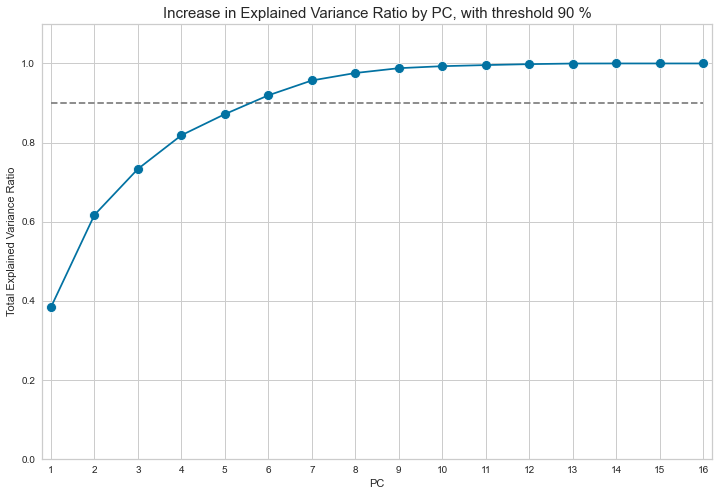

In [470]:
# Visualize Increase in Explained Variance Ratio 
explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)

plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()

ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))

ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')

plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.title("Increase in Explained Variance Ratio by PC, with threshold 90 %", fontsize = 15)

plt.show()

In [471]:
scaler = StandardScaler()
decomp= PCA(n_components=0.9)
cluster = KMeans()
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)), ('kmeans', KMeans())])

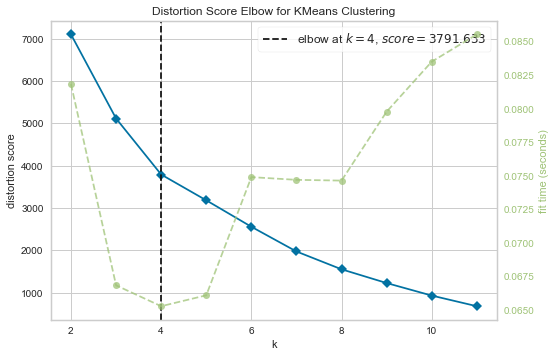

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [472]:
visualizer = KElbowVisualizer(pipe["kmeans"], k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [476]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KMeans(4)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=4))])

In [888]:
values = pipe[:2].transform(X)
values

array([[5.21416724, 1.73048393, 3.24770474, 7.14397413, 3.27395991],
       [4.5517031 , 2.30823443, 2.9676443 , 6.49391073, 2.36525473],
       [4.70896294, 1.25495154, 2.83183758, 6.57917136, 2.79852555],
       [3.71802919, 2.76405977, 2.4738964 , 5.73049081, 1.83021172],
       [3.50993593, 1.91198334, 1.97306308, 5.53341397, 1.53418842],
       [4.4549863 , 0.95919856, 2.56527609, 6.34268881, 2.68790418],
       [3.77828874, 1.46665057, 2.01030068, 5.69657208, 1.8669944 ],
       [2.34165038, 3.41875907, 1.54530202, 4.70076018, 2.95445161],
       [4.55210484, 0.9970989 , 2.67982288, 6.40331727, 2.91487142],
       [3.26790396, 2.2580246 , 2.52013359, 4.578051  , 0.79159087],
       [3.38495781, 2.54034658, 2.12999335, 5.4695305 , 2.47264835],
       [3.18480446, 1.84933423, 1.93945868, 5.01063576, 0.84193079],
       [2.33949506, 3.0558    , 1.81552425, 4.2597578 , 3.66999643],
       [1.12733261, 4.05094097, 2.69186482, 2.39161312, 3.16660385],
       [1.01680536, 3.8755166 , 2.

In [479]:
values = pipe[:2].transform(X)

pca_labels = [f"PC{idx+1}" for idx, i in enumerate(values.T)]
df_result = pd.DataFrame(values, columns = pca_labels)
df_result["name"] = df_name
df_result['clusters'] = pipe["kmeans"].labels_

df_result

,PC1,PC2,PC3,PC4,PC5,PC6,name,clusters
0,4.143441,-1.733713,-0.486112,-2.085651,-0.446193,-0.693729,L. Messi,0
1,3.645312,1.778951,0.298758,-0.001835,-0.574917,-0.819291,Cristiano Ronaldo,3
2,2.212012,-0.292766,-1.977055,-0.910522,-0.694831,1.045941,A. Robben,0
3,1.440611,4.242842,-1.290081,0.980466,0.560082,-0.386487,Z. Ibrahimović,3
4,1.455811,1.480387,0.563919,-0.233535,0.265032,-0.304838,NaN,3
5,1.182498,-1.678455,2.138913,-0.243851,0.862377,0.183244,L. Suárez,2
6,0.472826,0.473270,-1.504959,0.932533,0.078439,1.208937,E. Hazard,2
7,-2.243157,0.919054,-1.342302,0.044819,1.892497,-0.195185,R. van Persie,1
8,1.372942,-1.959600,0.184999,2.173217,-0.756782,-0.871216,B. Schweinsteiger,2
9,-0.849477,0.525833,1.601307,1.212306,-1.607006,0.715795,F. Ribéry,2


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

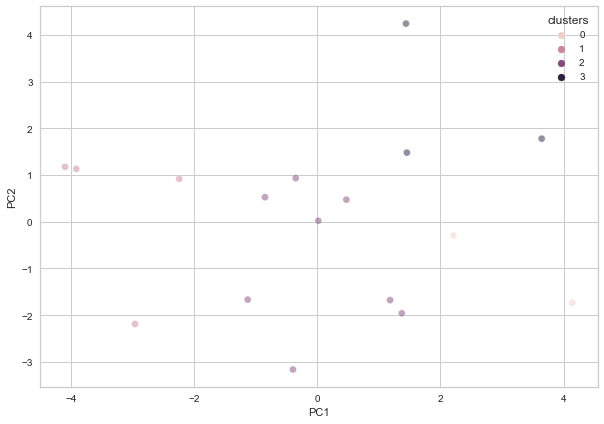

In [480]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_result, x="PC1", y="PC2", hue= "clusters", alpha=0.5)

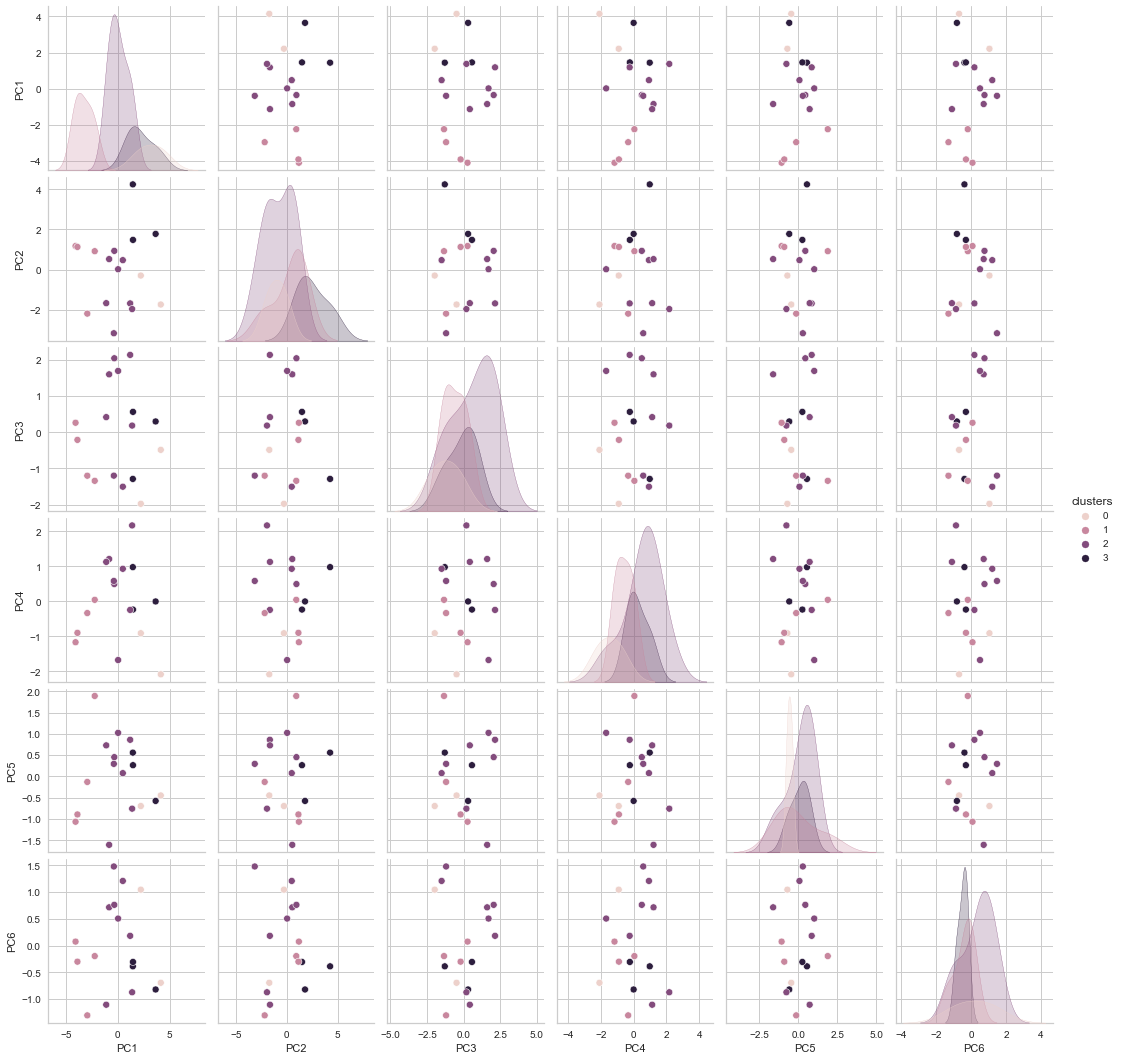

In [481]:
sns.pairplot(data = df_result, hue = "clusters")
plt.show()

### Summary

When using KMeans with PCA on all numerical variables, we cannot see any clear trends in the clusters

## KMeans with PCA, Reduced Variables


In [541]:
df.columns

Index(['player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club', 'overall', 'potential', 'value_eur',
       'wage_eur', 'player_positions', 'preferred_foot',
       'international_reputation', 'weak_foot', 'skill_moves', 'work_rate',
       'body_type', 'real_face', 'player_tags', 'team_position', 'loaned_from',
       'joined', 'nation_position', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'menta

In [542]:
df_red = df.loc[df.overall > 80][['short_name','pace', 'shooting', 'passing', 'dribbling','defending', 'physic']]

In [595]:
df_red.reset_index(drop = True, inplace = True)

In [596]:
df_red

,short_name,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0
...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0


In [597]:
df_name = df_red["short_name"]

In [598]:
# Take numerical columns
X = df_red.select_dtypes("number")

In [599]:
X

,pace,shooting,passing,dribbling,defending,physic
0,93.0,89.0,86.0,96.0,27.0,63.0
1,93.0,93.0,81.0,91.0,32.0,79.0
2,93.0,86.0,83.0,92.0,32.0,64.0
3,76.0,91.0,81.0,86.0,34.0,86.0
4,83.0,87.0,79.0,88.0,42.0,79.0
...,...,...,...,...,...,...
173,63.0,38.0,48.0,54.0,82.0,82.0
174,68.0,75.0,82.0,78.0,71.0,73.0
175,86.0,73.0,80.0,83.0,33.0,50.0
176,67.0,60.0,63.0,60.0,86.0,83.0


In [600]:
# Choosing PCA
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [601]:
# Explained Variance Ratio
pipe['pca'].explained_variance_ratio_

array([0.61714563, 0.14114362, 0.11987387, 0.09663443, 0.01578851,
       0.00941393])

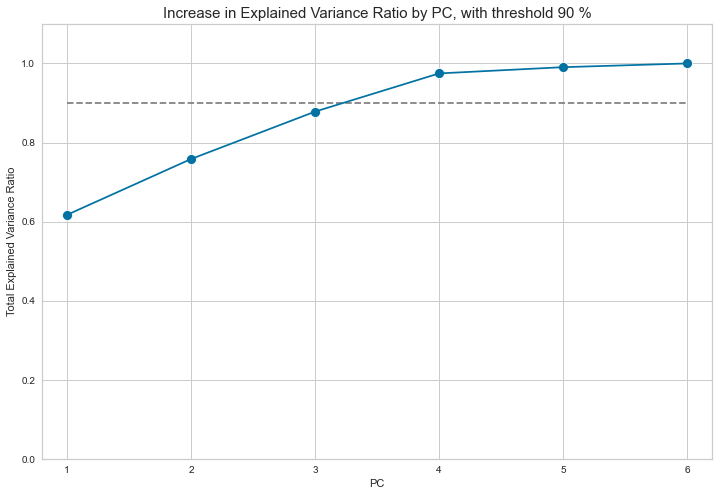

In [602]:
# Visualize Increase in Explained Variance Ratio 
explained_variance = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(explained_variance))]

fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=index, y=explained_variance)
sns.scatterplot(x=index, y=explained_variance, s=100)

plt.xlim((1-0.2, len(explained_variance)+0.2))
plt.ylim((0, 1.1))
x_s, x_e = ax.get_xlim()

ax.xaxis.set_ticks(np.arange(x_s+0.2, x_e))

ax.hlines(y=0.9, xmin=1, xmax=len(explained_variance), color='gray', linestyle='--')

plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.title("Increase in Explained Variance Ratio by PC, with threshold 90 %", fontsize = 15)

plt.show()

In [603]:
scaler = StandardScaler()
decomp= PCA(n_components=4)
cluster = KMeans()
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)), ('kmeans', KMeans())])

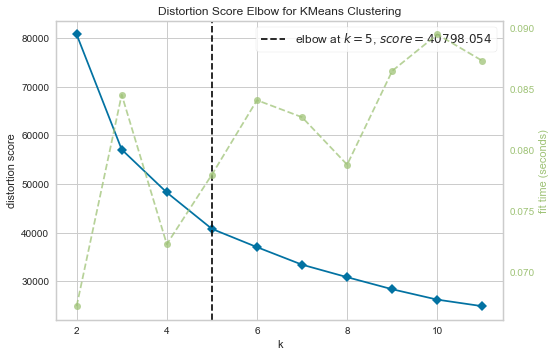

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [604]:
visualizer = KElbowVisualizer(pipe["kmeans"], k=(2,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [610]:
scaler = StandardScaler()
decomp = PCA(n_components=4)
cluster = KMeans(3)
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('kmeans', KMeans(n_clusters=3))])

In [611]:
values = pipe[:2].transform(X)

pca_labels = [f"PC{idx+1}" for idx, i in enumerate(values.T)]
df_result = pd.DataFrame(values, columns = pca_labels)
df_result['clusters'] = pipe["kmeans"].labels_

df_result

,PC1,PC2,PC3,PC4,clusters
0,-3.476883,-0.244664,-0.196959,-0.351177,0
1,-2.479070,-0.819564,-1.599481,0.022239,0
2,-2.922943,-0.444874,-0.113058,-0.425915,0
3,-1.364920,-0.045474,-1.862047,1.028803,2
4,-1.555677,-0.308097,-1.274776,0.251318,0
...,...,...,...,...,...
173,4.506109,-1.286403,1.079119,0.105392,1
174,0.017650,1.150856,-0.319988,0.032045,2
175,-2.206540,-0.185179,1.811563,-0.408779,0
176,2.864838,-0.298536,-0.190374,0.072630,1


In [612]:
df_result["name"] = df_name

In [614]:
df_result

,PC1,PC2,PC3,PC4,clusters,name
0,-3.476883,-0.244664,-0.196959,-0.351177,0,L. Messi
1,-2.479070,-0.819564,-1.599481,0.022239,0,Cristiano Ronaldo
2,-2.922943,-0.444874,-0.113058,-0.425915,0,A. Robben
3,-1.364920,-0.045474,-1.862047,1.028803,2,Z. Ibrahimović
4,-1.555677,-0.308097,-1.274776,0.251318,0,L. Suárez
...,...,...,...,...,...,...
173,4.506109,-1.286403,1.079119,0.105392,1,M. Škrtel
174,0.017650,1.150856,-0.319988,0.032045,2,Y. Cabaye
175,-2.206540,-0.185179,1.811563,-0.408779,0,M. Valbuena
176,2.864838,-0.298536,-0.190374,0.072630,1,B. Ivanović


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

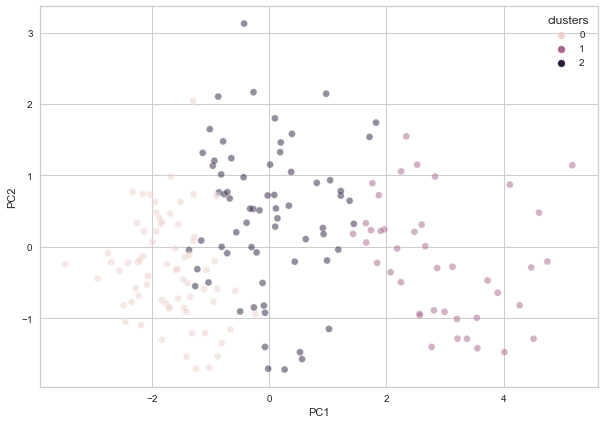

In [613]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_result, x="PC1", y="PC2", hue= "clusters", alpha=0.5)

### Summary

When using KMeans with PCA on Redcued number of variables, we cannot see any clear trends in the clusters

## Final Model: KMeans, Reduced Variables

In [806]:
df_tt = df_red.copy()

In [807]:
df_tt

,short_name,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0
...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0


In [632]:
X2 = df_tt.select_dtypes("number")

In [633]:
inertia_dict = {'clusters':[], 'inertia':[]}

for i in range(2,11):
    scaler = StandardScaler()
    cluster = KMeans(n_clusters=i)
    pipe = make_pipeline(scaler, cluster)
    pipe.fit(X2)
    inertia_dict["clusters"].append(i)
    inertia_dict["inertia"].append(pipe["kmeans"].inertia_)
    
inertia_df = pd.DataFrame(inertia_dict)

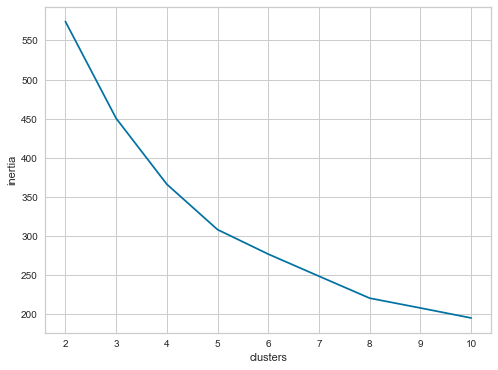

In [634]:
plt.figure(figsize=(8,6))
sns.lineplot(data=inertia_df, x="clusters", y="inertia")
plt.show()

### Elbow Correct Model

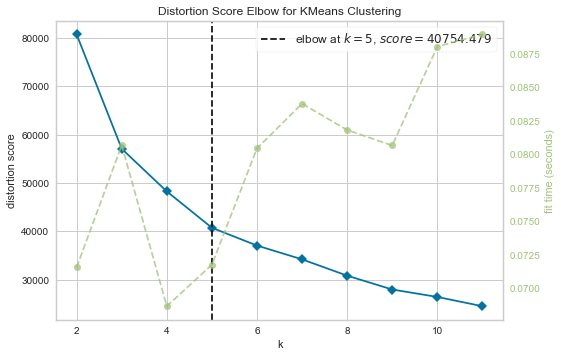

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [635]:
visualizer = KElbowVisualizer(pipe["kmeans"], k=(2,12))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()

In [820]:
pipe = make_pipeline(StandardScaler(), KMeans(n_clusters=5))
pipe.fit(X2)

df_tt['clusters'] = pd.Series(pipe["kmeans"].labels_)

In [821]:
df_tt

,short_name,pace,shooting,passing,dribbling,defending,physic,overall,clusters
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0,93,1
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0,92,1
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0,90,1
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0,90,4
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0,89,4
...,...,...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0,81,3
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0,81,2
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0,81,1
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0,81,3


### Pairplot Correct Model

No handles with labels found to put in legend.


<Figure size 864x360 with 0 Axes>

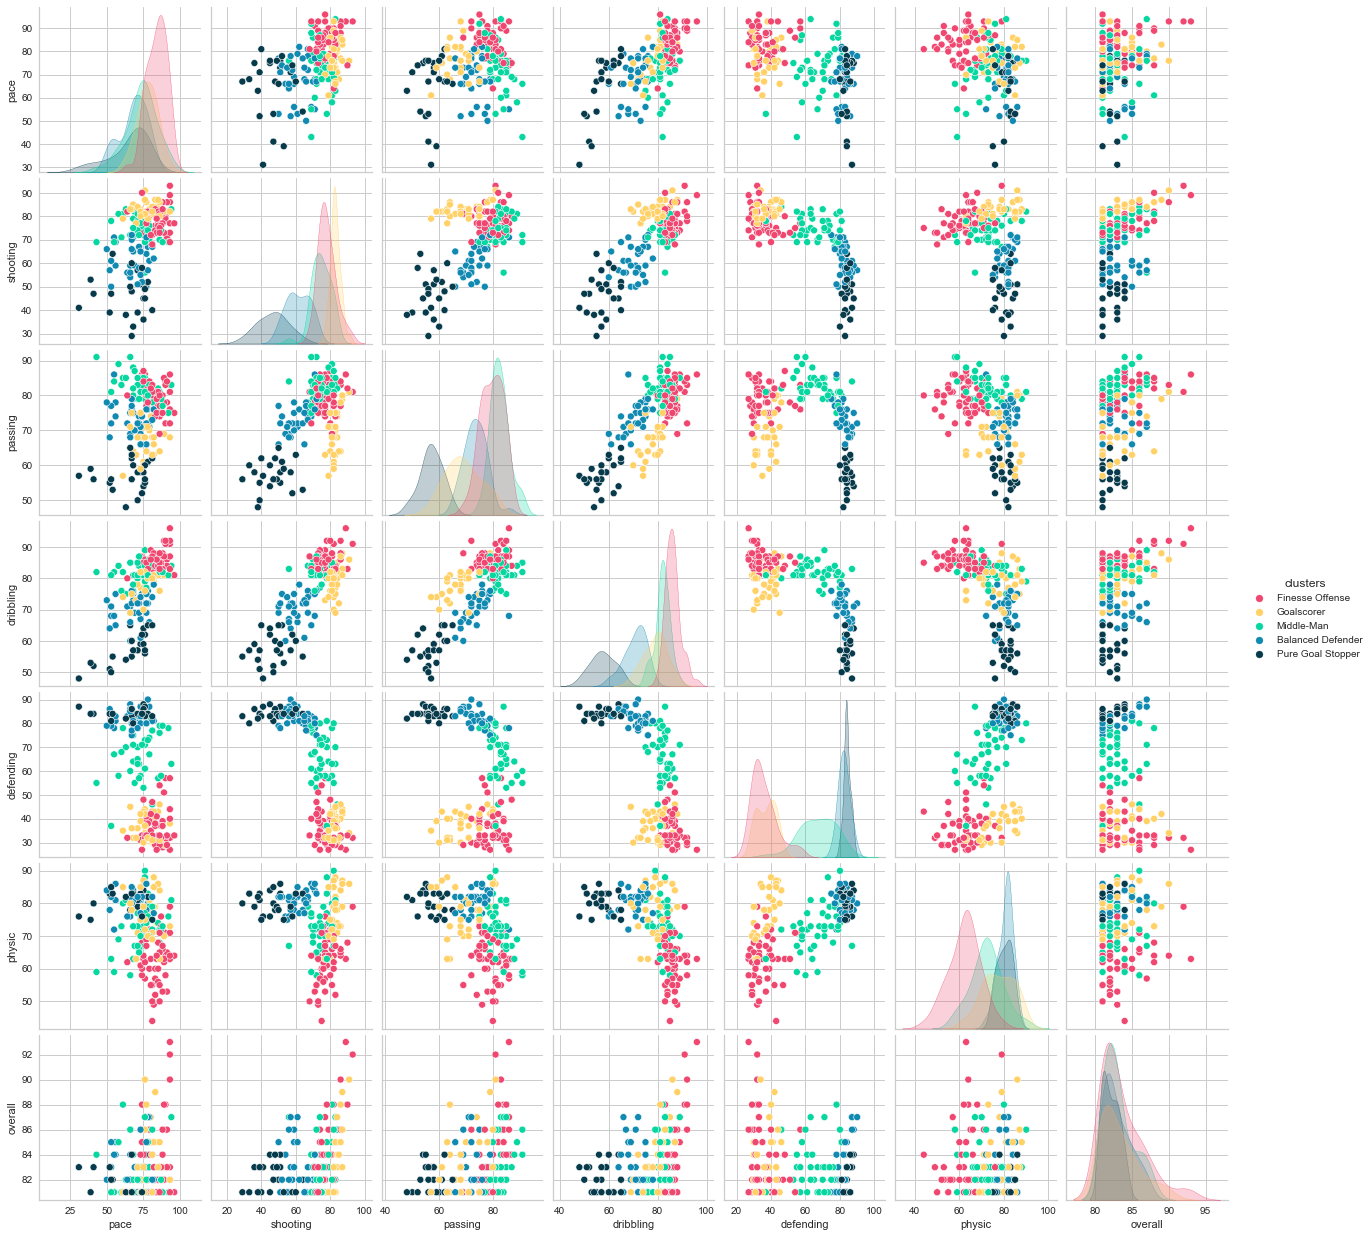

In [885]:
plt.figure(figsize = (12,5))

sns.pairplot(data = df_tt, hue = "clusters", palette = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"])
leg = plt.legend()
plt.savefig("pairplot.jpg")
plt.show()

In [640]:
df_tt.to_csv("kmeans_5_reduced_df.csv")

### Summary
In this model (K-Means with reduced variables) we can see obvious trends in the clusters in the pairplot above. This tells us that this clustering model does a pretty good job of identifying clusters that are significantly different from one another, and we will thereby continue the analysis using this model. 

## Cluster Analysis Final Model

### Add columns to `df_tt`

In [840]:
haha = pd.read_csv("kmeans_5_reduced_df.csv")
haha.drop("Unnamed: 0", axis = 1, inplace = True)

In [841]:
df_tt = haha.copy()

In [842]:
df_tt

,short_name,pace,shooting,passing,dribbling,defending,physic,clusters
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0,0
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0,0
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0,0
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0,4
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0,4
...,...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0,1
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0,3
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0,0
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0,1


In [843]:
df_info = df[["short_name", "overall"]].loc[df.overall > 80]
df_info

,short_name,overall
0,L. Messi,93
1,Cristiano Ronaldo,92
2,A. Robben,90
3,Z. Ibrahimović,90
4,M. Neuer,90
...,...,...
202,Y. Cabaye,81
203,M. Valbuena,81
204,B. Ivanović,81
205,Beto,81


In [844]:
df_tt = df_tt.merge(df_info, how = "left", on = "short_name")

In [845]:
df_tt

,short_name,pace,shooting,passing,dribbling,defending,physic,clusters,overall
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0,0,93
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0,0,92
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0,0,90
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0,4,90
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0,4,89
...,...,...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0,1,81
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0,3,81
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0,0,81
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0,1,81


### Naming the Clusters

Note that these names were created after the analysis was performed. It is necessary to perform the analysis before naming the columns to identify key differences between the clusters, and name them accordingly. I have added this chapter here, since I want to rerun the analysis with the new cluster names in order to name the axes properly in the graphs.

In [846]:
def cluster_naming(cluster):
    if cluster == 0:
        return "Finesse Offense"
    elif cluster == 1:
        return "Pure Goal Stopper"
    elif cluster == 2:
        return "Balanced Defender"
    elif cluster == 3:
        return "Middle-Man"
    else:
        return "Goalscorer"

df_tt["clusters"] = df_tt["clusters"].apply(cluster_naming)

In [870]:
clusters = ["Finesse Offense", "Pure Goal Stopper", "Balanced Defender", "Middle-Man", "Goalscorer"]

In [871]:
df_tt

,short_name,pace,shooting,passing,dribbling,defending,physic,clusters,overall
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0,Finesse Offense,93
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0,Finesse Offense,92
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0,Finesse Offense,90
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0,Goalscorer,90
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0,Goalscorer,89
...,...,...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0,Pure Goal Stopper,81
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0,Middle-Man,81
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0,Finesse Offense,81
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0,Pure Goal Stopper,81


### Barplots by Attribute

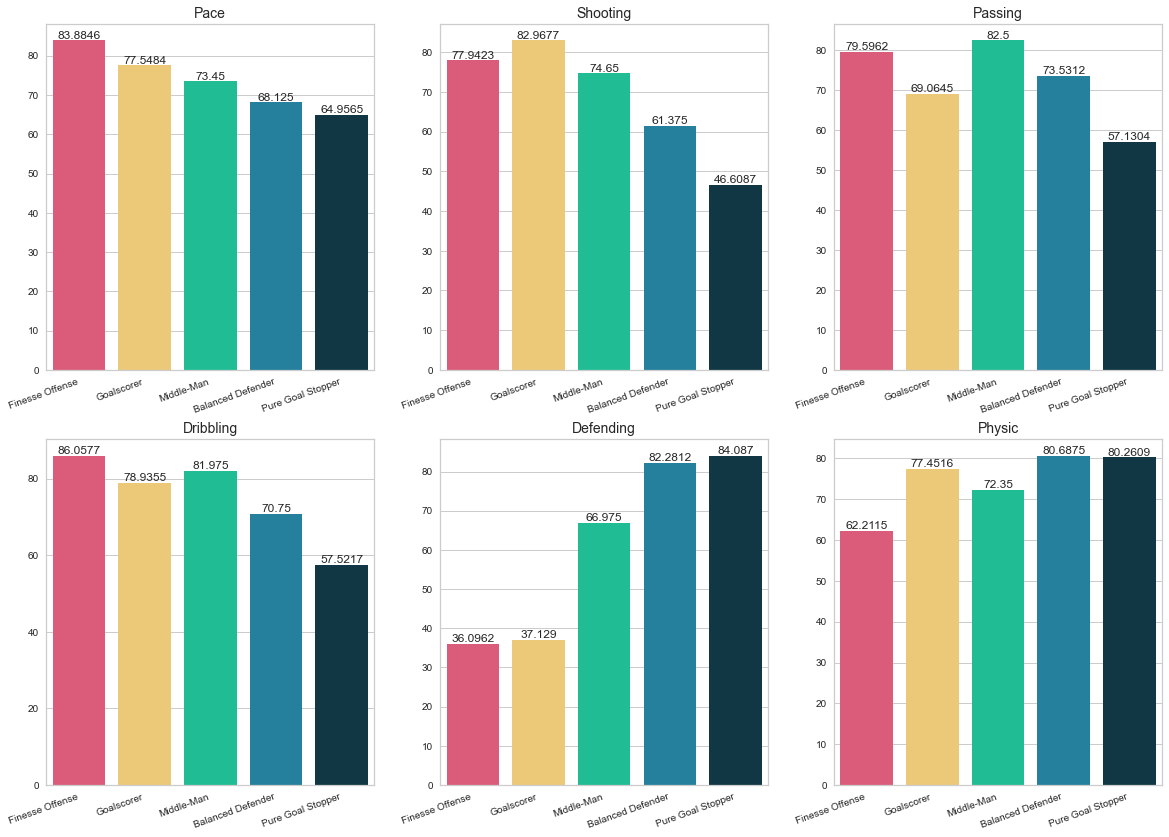

In [872]:
import math

var_list = X.columns

rows = math.ceil(len(var_list)/3)

fig, axs = plt.subplots(rows, 3, figsize=(20,7*rows))

for i, ax in zip(var_list, axs.flat):
    g = sns.barplot(data=df_tt, x="clusters", y=i, ax=ax, ci = None, 
                    palette = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"])
    ax.set(xlabel="", ylabel="")
    ax.set_title(i.title(), fontsize = 14)
    ax.set_xticklabels(df_tt.clusters.unique(), rotation=20, ha="right")
    ax.bar_label(ax.containers[0], label_type='edge')

    
for i in axs.flat[::-1][:rows*3-len(var_list)]:
    i.set_axis_off()
    
plt.show()

### Radar Charts by Cluster

In [873]:
# One df per cluster
df_0 = df_tt.loc[df_tt.clusters == "Finesse Offense"]
df_1 = df_tt.loc[df_tt.clusters == "Pure Goal Stopper"]
df_2 = df_tt.loc[df_tt.clusters == "Balanced Defender"]
df_3 = df_tt.loc[df_tt.clusters == "Middle-Man"]
df_4 = df_tt.loc[df_tt.clusters == "Goalscorer"]

cluster_df_list = [df_0, df_1, df_2, df_3, df_4]
cluster_df_vals = []

for i in cluster_df_list:
    cluster_df_vals.append(i.groupby('clusters').agg({'pace': 'mean', 
                         'shooting':'mean', 
                         'passing':'mean', 
                         'dribbling': 'mean',
                           'defending': 'mean',
                              'physic': 'mean'}))

# Contains mean of each attribute for each cluster
cluster_df_vals[2]

,pace,shooting,passing,dribbling,defending,physic
clusters,,,,,,
Balanced Defender,68.125,61.375,73.53125,70.75,82.28125,80.6875


In [874]:
cluster_df_vals[2].index[0]

'Balanced Defender'

In [875]:
import plotly.express as px
import pandas as pd

for index,i in enumerate(cluster_df_vals):
    df_temp = pd.DataFrame(dict(
        r = list(i.iloc[0].values),
        theta = list(i.columns)))
    fig = px.line_polar(df_temp, r='r', theta='theta', line_close=True, title = f"Player Type: {i.index[0]}", 
                        range_r = (0,100), markers = True)
    fig.update_traces(fill='toself')
    fig.show()

### Bar Plot, Mean Values by Cluster

In [876]:
cluster_mean_values = w.T.reset_index()
cluster_mean_values

clusters,index,0,1,2,3,4
0,pace,83.884615,64.956522,68.12500,73.450,77.548387
1,shooting,77.942308,46.608696,61.37500,74.650,82.967742
2,passing,79.596154,57.130435,73.53125,82.500,69.064516
3,dribbling,86.057692,57.521739,70.75000,81.975,78.935484
4,defending,36.096154,84.086957,82.28125,66.975,37.129032
5,physic,62.211538,80.260870,80.68750,72.350,77.451613


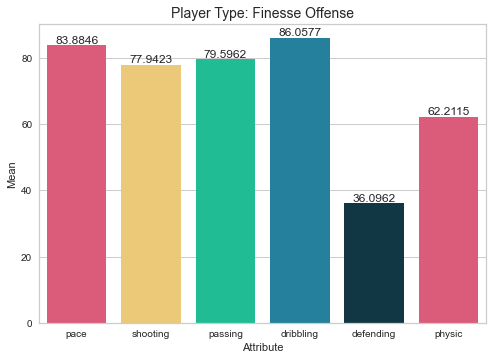

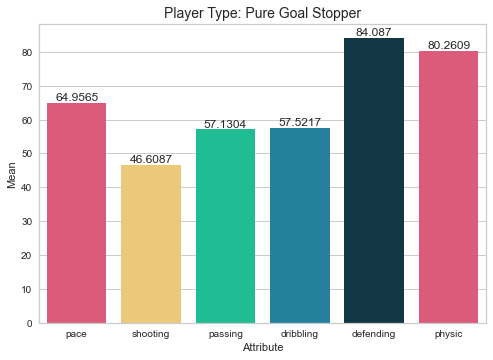

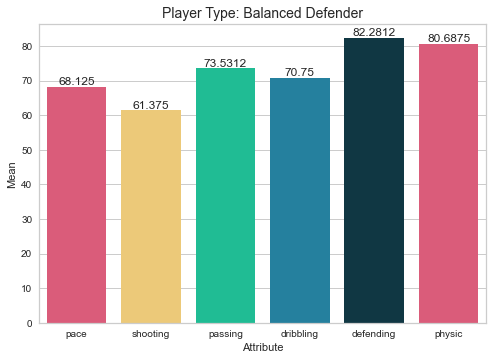

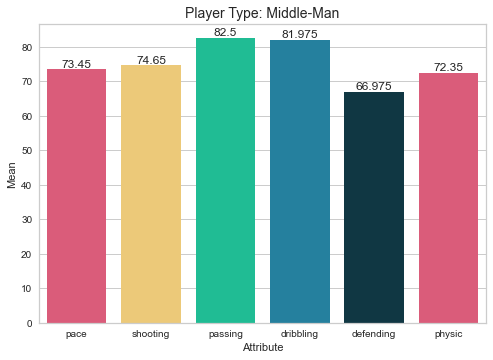

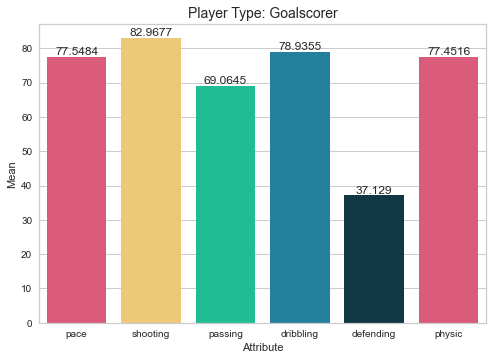

In [877]:
for i in range(0,5):
    fig, ax = plt.subplots()
    sns.barplot(data = cluster_mean_values, x = "index", y = i,
               palette = ["#ef476f","#ffd166","#06d6a0","#118ab2","#073b4c"])
    ax.bar_label(ax.containers[0], label_type='edge')
    ax.set_title(f"Player Type: {clusters[i]}", fontsize = 14)
    ax.set_ylabel("Mean")
    ax.set_xlabel("Attribute")
    plt.show()

### Some Descriptives Per Cluster

In [878]:
df_tt

,short_name,pace,shooting,passing,dribbling,defending,physic,clusters,overall
0,L. Messi,93.0,89.0,86.0,96.0,27.0,63.0,Finesse Offense,93
1,Cristiano Ronaldo,93.0,93.0,81.0,91.0,32.0,79.0,Finesse Offense,92
2,A. Robben,93.0,86.0,83.0,92.0,32.0,64.0,Finesse Offense,90
3,Z. Ibrahimović,76.0,91.0,81.0,86.0,34.0,86.0,Goalscorer,90
4,L. Suárez,83.0,87.0,79.0,88.0,42.0,79.0,Goalscorer,89
...,...,...,...,...,...,...,...,...,...
173,M. Škrtel,63.0,38.0,48.0,54.0,82.0,82.0,Pure Goal Stopper,81
174,Y. Cabaye,68.0,75.0,82.0,78.0,71.0,73.0,Middle-Man,81
175,M. Valbuena,86.0,73.0,80.0,83.0,33.0,50.0,Finesse Offense,81
176,B. Ivanović,67.0,60.0,63.0,60.0,86.0,83.0,Pure Goal Stopper,81


In [879]:
df_tt.groupby("clusters")["overall"].mean()

clusters
Balanced Defender    82.968750
Finesse Offense      83.615385
Goalscorer           83.290323
Middle-Man           83.125000
Pure Goal Stopper    82.130435
Name: overall, dtype: float64

In [880]:
df_tt.groupby("clusters")["overall"].std()

clusters
Balanced Defender    1.857580
Finesse Offense      2.924902
Goalscorer           2.571557
Middle-Man           2.002402
Pure Goal Stopper    1.099766
Name: overall, dtype: float64

In [881]:
df_tt.loc[df_tt.clusters == "Pure Goalblocker"]

,short_name,pace,shooting,passing,dribbling,defending,physic,clusters,overall


In [889]:
for i in clusters:
    temp_df = df_tt.loc[df_tt.clusters == i]
    print(f"Top 5 Players in Player Type: {i}")
    print("\n")
    index = temp_df["overall"].nlargest(5).index
    for x in index:
        print(f"Player: {df_tt.loc[x].short_name}, {df_tt.loc[x].overall}") 
    print("\n")

Top 5 Players in Player Type: Finesse Offense


Player: L. Messi, 93
Player: Cristiano Ronaldo, 92
Player: A. Robben, 90
Player: E. Hazard, 88
Player: R. van Persie, 88


Top 5 Players in Player Type: Pure Goal Stopper


Player: M. Benatia, 84
Player: G. Chiellini, 84
Player: D. Godín, 84
Player: J. Terry, 83
Player: P. Mertesacker, 83


Top 5 Players in Player Type: Balanced Defender


Player: Sergio Ramos, 87
Player: Thiago Silva, 87
Player: M. Hummels, 86
Player: V. Kompany, 86
Player: Sergio Busquets, 85


Top 5 Players in Player Type: Middle-Man


Player: B. Schweinsteiger, 88
Player: G. Bale, 87
Player: P. Lahm, 87
Player: L. Modrić, 87
Player: T. Müller, 86


Top 5 Players in Player Type: Goalscorer


Player: Z. Ibrahimović, 90
Player: L. Suárez, 89
Player: Falcao, 88
Player: R. Lewandowski, 87
Player: W. Rooney, 86


